<a href="https://colab.research.google.com/github/rominicky/mineria-texto-python/blob/main/ulrich_exploraciones_textuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis textual de texto [Comentarios de Álvar Núñez Cabeza de Vaca](https://github.com/rominicky/comentarios-cabeza-de-vaca)

### Por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

Esta notebook tiene como objetivo trabajar sobre el texto en formato plano elaborado para el proyecto [Comentarios de Álvar Núñez Cabeza de Vaca](https://github.com/rominicky/comentarios-cabeza-de-vaca). El propósito es generar visualizaciones basadas en el análisis textual, así como explorar las relaciones entre personajes, los pueblos originarios mencionados en los trayectos y episodios de esta crónica.

Para ello, se utilizarán diversas bibliotecas como [spaCy](https://spacy.io/), [NLTK](https://www.nltk.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/), entre otras. A lo largo del código se ofrecerá una breve descripción de cada una de ellas y su aplicación.

### Instalación y llamado de librerías y módulos

In [3]:
!pip install spacy #librería SpaCy útil para análisis textual

!pip install networkx matplotlib #librería para generar visualizaciones estáticas, animadas e interactivas

ERROR: Invalid requirement: '#librería': Expected package name at the start of dependency specifier
    #librería
    ^
ERROR: Invalid requirement: '#librería': Expected package name at the start of dependency specifier
    #librería
    ^


In [4]:
!python -m spacy download es_core_news_lg #Descarga del modelo de entrenamiento y procesado de textos para el español, md indica modelo de tamaño mediano

ERROR: Invalid requirement: '#Descarga': Expected package name at the start of dependency specifier
    #Descarga
    ^


In [ ]:
!pip install seaborn """ Librería para gráficos estadísticos."""

In [37]:
!pip install wordcloud

In [7]:
#Librerías y módulos para generar visualizaciones

import matplotlib.pyplot as plt
import seaborn as sns

### Carga de texto

In [ ]:
# Cargamos el texto desde GitHub
#Requests librería para importar url
import requests
""" 
#función para descardar desde una url y con advertencia si existe error en el sitio web
def download_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Excepciones por error de acceso
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error de descarga de la URL: {e}")
        return None

url = "/assets/downloads/comentarios.txt"
comentarios_txt = download_text_from_url(url)

if comentarios_txt:
    print(comentarios_txt[:100])

else:
    print("Error al tratar de descargar el archivo") #advertencia que no se puedo descargar el archivo
 """

/assets/downloads/comentarios.txt


In [49]:
# Cargar el texto desde la ruta relativa
with open(r'C:\git\comentarios\assets\downloads\comentarios.txt', 'r', encoding='utf-8') as f:
    comentarios_txt = f.read()

# Imprimir los primeros 500 caracteres
print(comentarios_txt[:500])

COMENTARIOS

Cabeza de Vaca, adelantado y gobernador del Río de la Plata

Escriptos por Pero Hernández, escribano y secretario de la provincia, y dirigidos al serenísimo, muy alto y muy poderoso señor el Infante Don Carlos N. S.

INDICE:

CAPÍTULO I
De los comentarios de Alvar Núñez Cabeza de Vaca

CAPÍTULO II
De cómo partimos de la isla de Cabo Verde

CAPÍTULO III
Que trata de cómo el gobernador llegó con su armada a la isla de Santa Catalina, que es en el Brasil, y desembarcó allí con su armad


Para proceder con el análisis textual trabajaremos en el archivo de texto plano de la obra de comentarios Schmidel, generado desde los archivos codificados en TEI-XML, para que no hubieses diferencias entre ambos.

### Limpieza y tokenización del texto


A las palabras vacías, stopwords, generales del idioma español se añadieron las más frecuentes que se pueden considerar a una primera vista del texto, denominadas 'stopwords del siglo XVI'.

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Recursos de NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [121]:
import unicodedata
# Función de normalización y eliminación de signos no útiles
def normalizar(texto):
    texto = unicodedata.normalize('NFKD', texto)
    return ''.join([c for c in texto if not unicodedata.combining(c)])

# Stopwords del siglo XVI
stopwords_siglo_XVI_raw = {
    'aquel', 'aquella', 'ansi', 'aquellos', 'aquelas', 'sino', 'assi', 'assí', 'así', 'aun',
    'à', 'á', 'ó', 'ò', 'i', 'o',
    'hast', 'dende', 'dixo', 'dixeron', 'dixieron',
    'desque', 'después', 'allí', 'día', 'porque', 'pues', 'otro', 'otros', 'tanto', 'todo', 'muy',
    'más', 'menos', 'era', 'fue', 'fueron', 'había', 'tenía', 'mandó', 'vino', 'dio', 'dijo',
    'CAPÍTULO', 'CAPITULO', 'CAPÍTULOS', 'ÍNDICE', 'INDICE', '\n\nCAPÍTULO V\nDe', '\n\nINDICE', '\n\n'
}

# Normalizamos todas las stopwords
stopwords_siglo_XVI = set([normalizar(p.lower()) for p in stopwords_siglo_XVI_raw])
nltk_stopwords = set([normalizar(p.lower()) for p in stopwords.words('spanish')])
stopwords_completas = nltk_stopwords.union(stopwords_siglo_XVI)

# Función auxiliar: normalizar tildes y eliminar signos no útiles
def normalizar(texto):
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join([c for c in texto if not unicodedata.combining(c)])
    return texto

# Función de limpieza del texto, se utiliza expresiones regulares para encontrar y eleminar determinadas cadenas de caracteres
def limpiar_texto(texto):
    texto = texto.lower()
    texto = normalizar(texto)
    texto = re.sub(r'ÍNDICE|CAP[ÍI]TULO\s+[XLIVC\d]+\s*[\w\s]*', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.lower().split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas and len(palabra) > 2] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

# Función para limpiar y tokenizar
def clean_and_tokenize(text):
    # Eliminar caracteres especiales y tokenizar
    text = normalizar(text)
    tokens = word_tokenize(re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ]', ' ', text.lower()))
    # Filtrar stopwords
    tokens = [word for word in tokens if word not in stopwords_completas and len(word) > 2]
    return tokens

In [122]:
#carga de texto para limpieza
text = comentarios_txt
texto_limpio = limpiar_texto(text)

""" # Guarda el texto limpio
with open('texto_limpio.txt', 'w', encoding='utf-8') as file:
    file.write(texto_limpio)
 """
print("Archivo 'texto_limpio.txt' creado exitosamente.")
print(texto_limpio[:500])

Archivo 'texto_limpio.txt' creado exitosamente.
comentarios cabeza vaca adelantado gobernador rio plata escriptos hernandez escribano secretario provincia dirigidos serenisimo alto poderoso senor infante don carlos brasil desembarco armada manera pinos pifias aquellas tierras remediaron gusanos sacaban unas canas salvar mal paso salto rio hacia llevo tierra canoas legua fuerza brazos cristianos espanoles iba socorrer tornasen poblar comen rio ahogaron dos cristianos yendo siguiendo enemigos avisado gobernador iban delante envio llamar hechas 


In [123]:
texto = comentarios_txt
# Aplicar la función clean_and_tokenize
tokens = clean_and_tokenize(texto)

""" # Guardar los tokens en un archivo (como texto o como lista)
with open("comentarios_tokens.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(" ".join(tokens))  # Los tokens se guardan como texto
 """
print("Tokens guardados en 'comentarios_tokens.txt'.")
print(tokens[:25])

Tokens guardados en 'comentarios_tokens.txt'.
['comentarios', 'cabeza', 'vaca', 'adelantado', 'gobernador', 'rio', 'plata', 'escriptos', 'hernandez', 'escribano', 'secretario', 'provincia', 'dirigidos', 'serenisimo', 'alto', 'poderoso', 'senor', 'infante', 'don', 'carlos', 'comentarios', 'alvar', 'nunez', 'cabeza', 'vaca']


In [124]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
import spacy
import pandas as pd

nltk.download('punkt')  # Recursos para la tokenización
nltk.download('averaged_perceptron_tagger')  # Modelo para el etiquetado POS
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_lg")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [125]:
# Procesamiento con SpaCy
doc = nlp(texto)

# lista de tuplas (palabra, etiqueta POS)
datos = [(token.text, token.pos_) for token in doc]

# Conversión de la lista en un dataframe
df = pd.DataFrame(datos, columns=["Palabra", "Etiqueta_POS"])

# Guardado del DataFrame en CSV
df.to_csv("etiquetas_pos_comentarios.csv", index=False, encoding="utf-8")

print("Archivo CSV generado con éxito: etiquetas_pos_comentarios.csv")

print(df.head(20))

Archivo CSV generado con éxito: etiquetas_pos_comentarios.csv
        Palabra Etiqueta_POS
0   COMENTARIOS         NOUN
1          \n\n        SPACE
2        Cabeza        PROPN
3            de          ADP
4          Vaca        PROPN
5             ,        PUNCT
6    adelantado          ADJ
7             y        CCONJ
8    gobernador         NOUN
9           del          ADP
10          Río        PROPN
11           de          ADP
12           la          DET
13        Plata        PROPN
14         \n\n        SPACE
15    Escriptos        PROPN
16          por          ADP
17         Pero        CCONJ
18    Hernández        PROPN
19            ,        PUNCT


### Cálculo de etiquetas POS

In [126]:
# Calculo de la cantidad de cada tipo de etiqueta POS
pos_counts = df['Etiqueta_POS'].value_counts()
pos_counts

Etiqueta_POS
NOUN     10452
ADP       9000
DET       7957
VERB      7808
PRON      6035
PUNCT     6010
CCONJ     4710
ADJ       2350
ADV       2112
AUX       2020
SCONJ     1878
PROPN     1850
NUM        635
SPACE      424
INTJ         3
PART         1
SYM          1
Name: count, dtype: int64

### Cálculo de sustantivos, adjetivos y verbos más comunes según etiquetado POS

In [127]:
# Función que trae palabras más frecuentes con etiqueta POS
def get_top_n_words(df, pos_tag, n=20):
    words = df[df['Etiqueta_POS'] == pos_tag]['Palabra'].value_counts().head(n)
    return words

# Más frecuentes según categoría gramatical
top_nouns = get_top_n_words(df, 'NOUN')
top_adjectives = get_top_n_words(df, 'ADJ')
top_verbs = get_top_n_words(df, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns)
print("\nAdjetivos más frecuentes:\n", top_adjectives)
print("\nVerbos más frecuentes:\n", top_verbs)


Sustantivos más frecuentes:
 Palabra
indios         634
tierra         482
gobernador     462
gente          275
río            231
cristianos     152
puerto         146
camino         136
día            129
días           119
españoles      110
guerra          90
bastimentos     88
generación      77
ciudad          76
oficiales       73
parte           73
tiempo          71
canoas          69
amigos          67
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
gran           111
grandes         78
naturales       77
dicho           65
principal       64
principales     51
grande          43
buena           32
mayor           29
buen            28
dichos          25
buenos          24
CAPÍTULO        24
contentos       22
juntos          21
cargados        21
guaycurúes      18
guaraníes       16
dicha           16
natural         15
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
hacer       142
mandó       132
tenían      107
dar          85
ansí         84
ti

In [128]:
#Cálculo de nombres y lugares en el texto 
import spacy
# Cargar el modelo en español de spaCy
nlp_es = spacy.load("es_core_news_lg")
#Realizo una limpieza especial para NER
def limpiar_texto2(texto):
    texto = normalizar(texto)
    texto = re.sub(r'INDICE|ÍNDICE|CAP[ÍI]TULO\s+[XLIVC\d]+\s*[\w\s]*', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas and len(palabra) > 2] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

#función para encontrar nombre de personas y lugares
def find_names_and_places(text, language="es"):
    if language == "es":
        doc = nlp_es(text)
    else:
        raise ValueError("Error de idioma")

    names = []
    places = []
    for ent in doc.ents:
        if ent.label_ == "PER":
            names.append(ent.text)
        elif ent.label_ == "LOC" or ent.label_ == "GPE":
            places.append(ent.text)

    return names, places


text = limpiar_texto2(comentarios_txt)

#aplico la funcion al texto
spanish_names, spanish_places = find_names_and_places(text, language="es")

print("Nombres", spanish_names[:25])
print("Lugares:", spanish_places[:25])


Nombres ['Hernandez', 'senor Infante Don Carlos', 'Majestad capitan Ribera', 'Pedro Mendoza', 'Majestad', 'Alvar Nunez Cabeza Vaca', 'Cabeza Vaca', 'Majestad', 'Alvar Nunez', 'Majestad', 'murio ningun', 'porne aqui', 'Majestad', 'Santa Catalina', 'Majestad', 'Bernaldo Armenta natural Cordoba', 'Alonso Lebron', 'Felipe Caceres', 'Pedro Mendoza', 'Juan Ayolas', 'Pedro Mendoza', 'Domingo Irala vizcaino', 'Juan Ayolas', 'Juan Ayolas', 'Domingo Irala']
Lugares: ['Rio Plata', 'corte Majestad', 'Rio Plata', 'capitania general tierra', 'Sevilla', 'Canaria', 'Cadiz', 'isla Palma', 'Cabo Verde', 'isla Santiago', 'Espana', 'Palma isla Cabo Verde', 'Indias', 'Cananea pasado Cabo Frio', 'partio paso rio bahia', 'San Francisco', 'Cananea', 'San Francisco', 'isla Santa Catalina', 'Brasil', 'isla Santa Catalina', 'Espana', 'Rio Plata', 'Cananea', 'Brasil']


# Gráficos

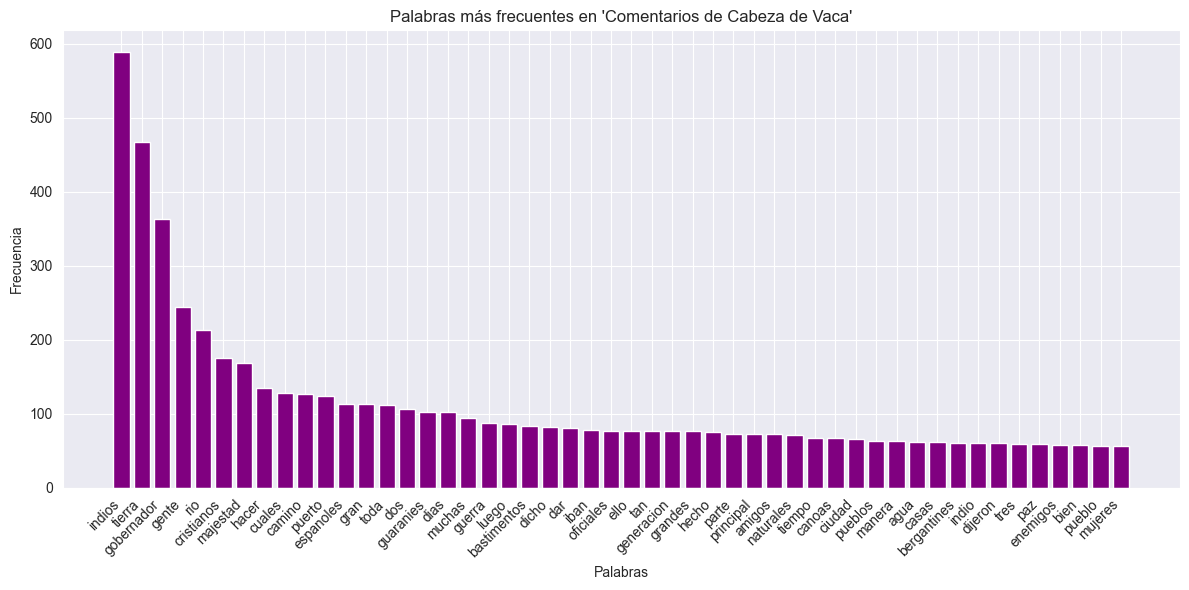

In [129]:
# Gráfico de palabas más frecuentes en texto que fue procesado mediante limpieza

import matplotlib.pyplot as plt
from collections import Counter

""" # Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Tokenización
palabras = texto_limpio.split()

# Cálcilo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='purple')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Comentarios de Cabeza de Vaca'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

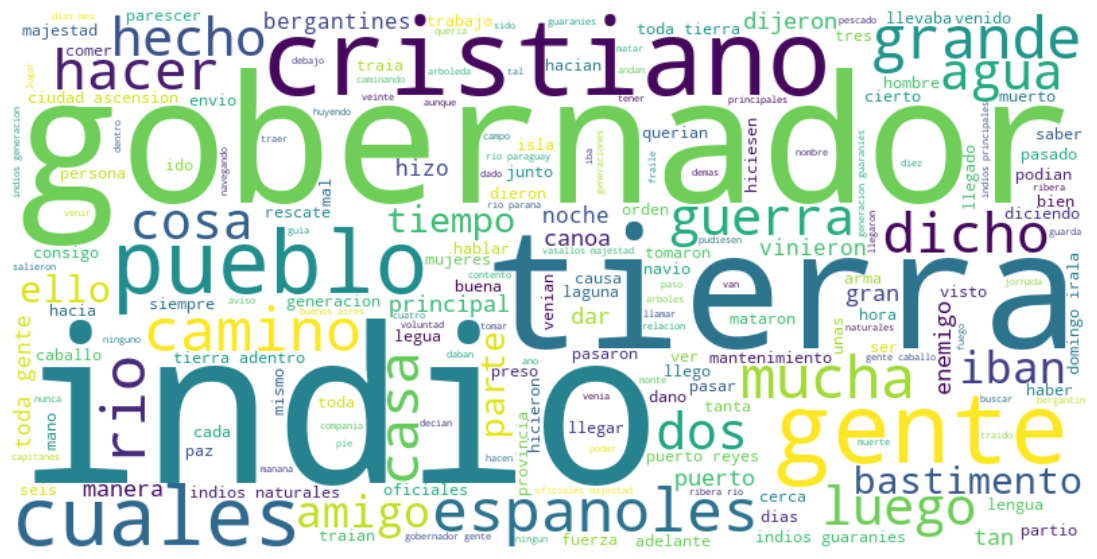

In [130]:
# Nube de palabras

from wordcloud import WordCloud
import matplotlib.pyplot as plt

""" # Lee el texto
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

# Muestra la nube de palabras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

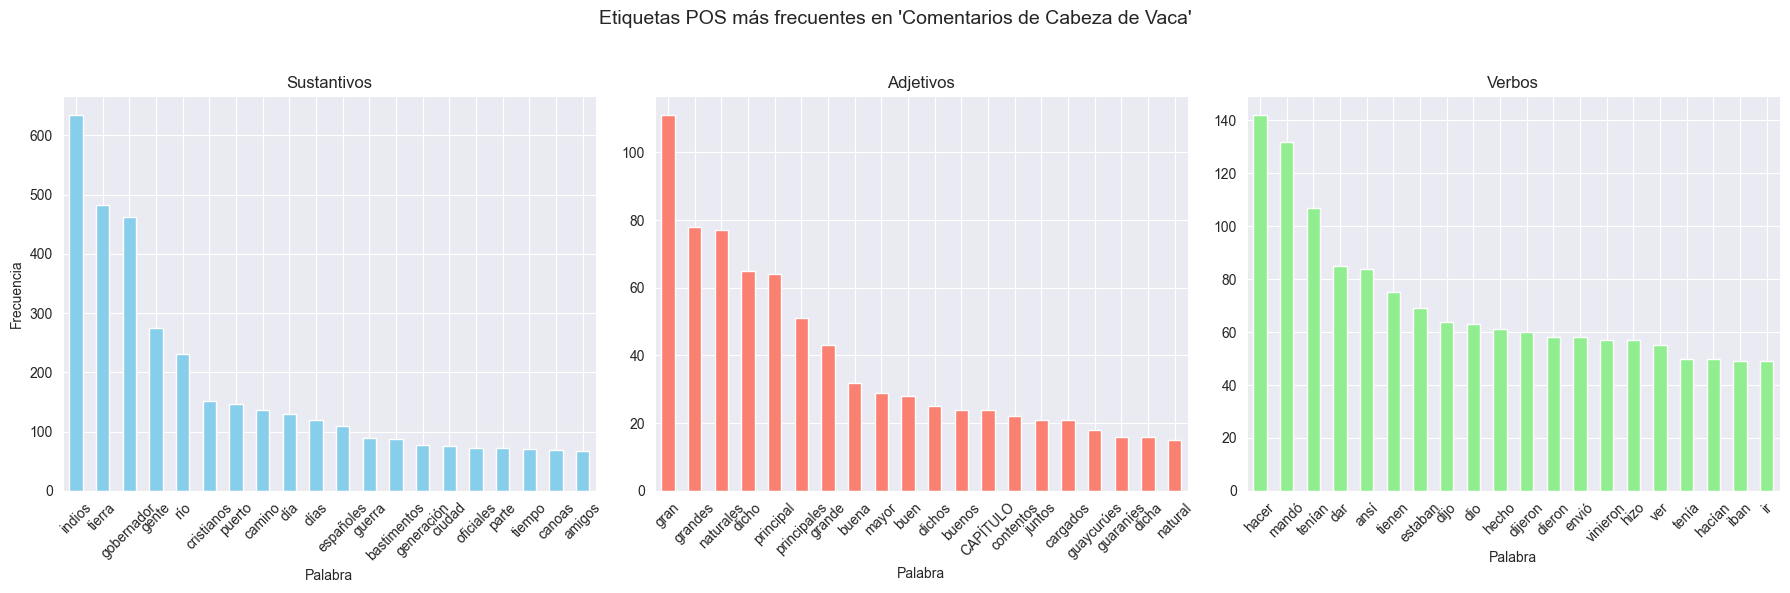

In [131]:
sns.set_style("darkgrid")

# Tamaño de la figura
plt.figure(figsize=(18, 6))
plt.suptitle("Etiquetas POS más frecuentes en 'Comentarios de Cabeza de Vaca'", fontsize=14)

# Gráfico de Sustantivos
ax1 = plt.subplot(1, 3, 1)
top_nouns.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Sustantivos', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de Adjetivos
ax2 = plt.subplot(1, 3, 2)
top_adjectives.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Adjetivos', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Gráfico de Verbos
ax3 = plt.subplot(1, 3, 3)
top_verbs.plot(kind='bar', color='lightgreen', ax=ax3)
ax3.set_title('Verbos', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

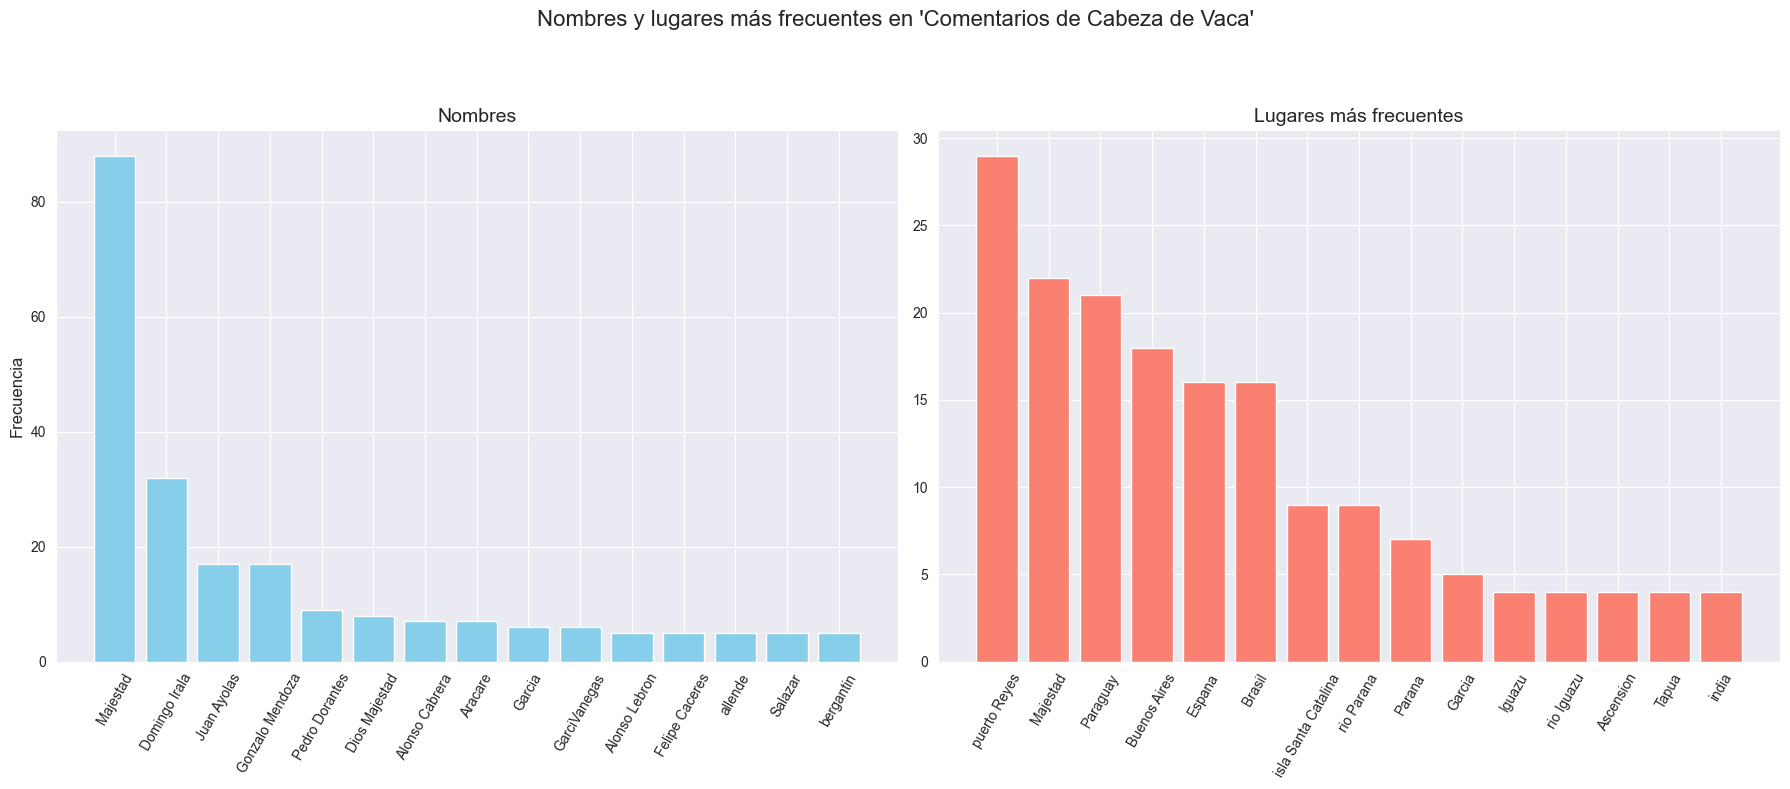

In [132]:
from collections import Counter
import matplotlib.pyplot as plt

# Cálculo de la frecuencia de nombres y lugares
name_counts = Counter(spanish_names)
place_counts = Counter(spanish_places)

#Listas para graficar
names, name_freqs = zip(*name_counts.most_common(15))
places, place_freqs = zip(*place_counts.most_common(15))

# Tamaño de la figura
plt.figure(figsize=(18, 8))
plt.suptitle("Nombres y lugares más frecuentes en 'Comentarios de Cabeza de Vaca'", fontsize=16)

# Gráfico de Nombres
ax1 = plt.subplot(1, 2, 1)
ax1.bar(names, name_freqs, color='skyblue', width=0.8)
ax1.set_title('Nombres', fontsize=14)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.tick_params(axis='x', rotation=60, labelsize=10)

# Gráfico de Lugares
ax2 = plt.subplot(1, 2, 2)
ax2.bar(places, place_freqs, color='salmon', width=0.8)
ax2.set_title('Lugares más frecuentes', fontsize=14)
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [159]:
import re
from collections import Counter

# Simplificá el texto a minúsculas
text = limpiar_texto(comentarios_txt)

# Buscá las menciones
vaca_menciones = re.findall(r'\b(cabeza de vaca|adelantado|gobernador)\b', text)
irala_menciones = re.findall(r'\b(irala|domingo martínez de irala|capitán irala|domingo irala|domingo de irala|martinez de irala)\b', text)

print("Menciones de Cabeza de Vaca:", len(vaca_menciones))
print("Menciones de Irala:", len(irala_menciones))

# Extraer oraciones donde se mencione a Vaca o Irala
oraciones_vaca = [sent.text for sent in doc.sents if "vaca" in sent.text.lower() or "gobernador" in sent.text.lower() or "adelantado" in sent.text.lower()]
oraciones_irala = [sent.text for sent in doc.sents if "irala" in sent.text.lower() or "domingo irala" in sent.text.lower() or "domingo de irala" in sent.text.lower()]

tokens_irala = []
for oracion in oraciones_irala:
    tokens_irala.extend(clean_and_tokenize(oracion))

tokens_vaca = []
for oracion in oraciones_vaca:
    tokens_vaca.extend(clean_and_tokenize(oracion))

""" tokens_irala = clean_and_tokenize(oraciones_irala)
tokens_vaca = clean_and_tokenize(oraciones_vaca) """

def contexto_palabra(tokens, palabra_objetivo, ventana=5):
    contexto = []
    for i, token in enumerate(tokens):
        if palabra_objetivo in token:
            inicio = max(0, i - ventana)
            fin = min(len(tokens), i + ventana + 1)
            contexto.append(tokens[inicio:fin])
    return contexto

# Frecuencias de palabras cerca de "irala" y "vaca"
cooc_irala = contexto_palabra(tokens_irala, "irala")
cooc_vaca = contexto_palabra(tokens_vaca, "gobernador")

from itertools import chain

print("\nPalabras cercanas a 'Domingo de Irala':")
# Flatten the list of contexts and count word frequencies
cooc_irala_flat = list(chain.from_iterable(cooc_irala))
cooc_irala_counter = Counter(cooc_irala_flat)
print(cooc_irala_counter.most_common(10))

print("\nPalabras cercanas a 'Cabeza de Vaca':")
cooc_vaca_flat = list(chain.from_iterable(cooc_vaca))
cooc_vaca_counter = Counter(cooc_vaca_flat)
print(cooc_vaca_counter.most_common(10))



Menciones de Cabeza de Vaca: 365
Menciones de Irala: 35

Palabras cercanas a 'Domingo de Irala':
[('domingo', 43), ('irala', 42), ('oficiales', 15), ('gobernador', 11), ('capitan', 8), ('indios', 7), ('tierra', 6), ('vizcaino', 5), ('luego', 5), ('hacer', 5)]

Palabras cercanas a 'Cabeza de Vaca':
[('gobernador', 510), ('indios', 121), ('gente', 102), ('tierra', 86), ('majestad', 48), ('rio', 45), ('oficiales', 39), ('puerto', 32), ('camino', 30), ('espanoles', 30)]


In [160]:
# Contextos para algunas palabras clave
contexto_traicion = contexto_palabra(tokens_irala, "traicion")
contexto_legitimo = contexto_palabra(tokens_irala, "legitimo")
contexto_rebelion = contexto_palabra(tokens_irala, "rebelion")

# Mostrar ejemplos
print("\nContextos de 'traicion':")
for c in contexto_traicion[:3]:
    print(" ".join(c))

print("\nContextos de 'legitimo':")
for c in contexto_legitimo[:3]:         
    print(" ".join(c))

print("\nContextos de 'rebelion':")
for c in contexto_rebelion[:3]:
    print(" ".join(c))

# Análisis de co-ocurrencias entre Cabeza de Vaca e Irala
# Contextos 
contexto_traicion1 = contexto_palabra(tokens_vaca, "traicion")
contexto_legitimo1 = contexto_palabra(tokens_vaca, "legitimo")
contexto_rebelion1 = contexto_palabra(tokens_vaca, "rebelion")

# Mostrar ejemplos
print("\nContextos de 'traicion':")
for c in contexto_traicion1[:3]:
    print(" ".join(c))

print("\nContextos de 'legitimo':")
for c in contexto_legitimo1[:3]:         
    print(" ".join(c))

print("\nContextos de 'rebelion':")
for c in contexto_rebelion1[:3]:
    print(" ".join(c))


Contextos de 'traicion':

Contextos de 'legitimo':

Contextos de 'rebelion':

Contextos de 'traicion':
enemigos dar atrevimiento hacer alguna traicion costumbre acordo enviar enfermos rio
guardarse enemigos suelen hacer mayores traiciones maldades algun descuido confianza suelen
sospechado indios venian hacer alguna traicion ver real debajo ofrecimientos razon

Contextos de 'legitimo':

Contextos de 'rebelion':


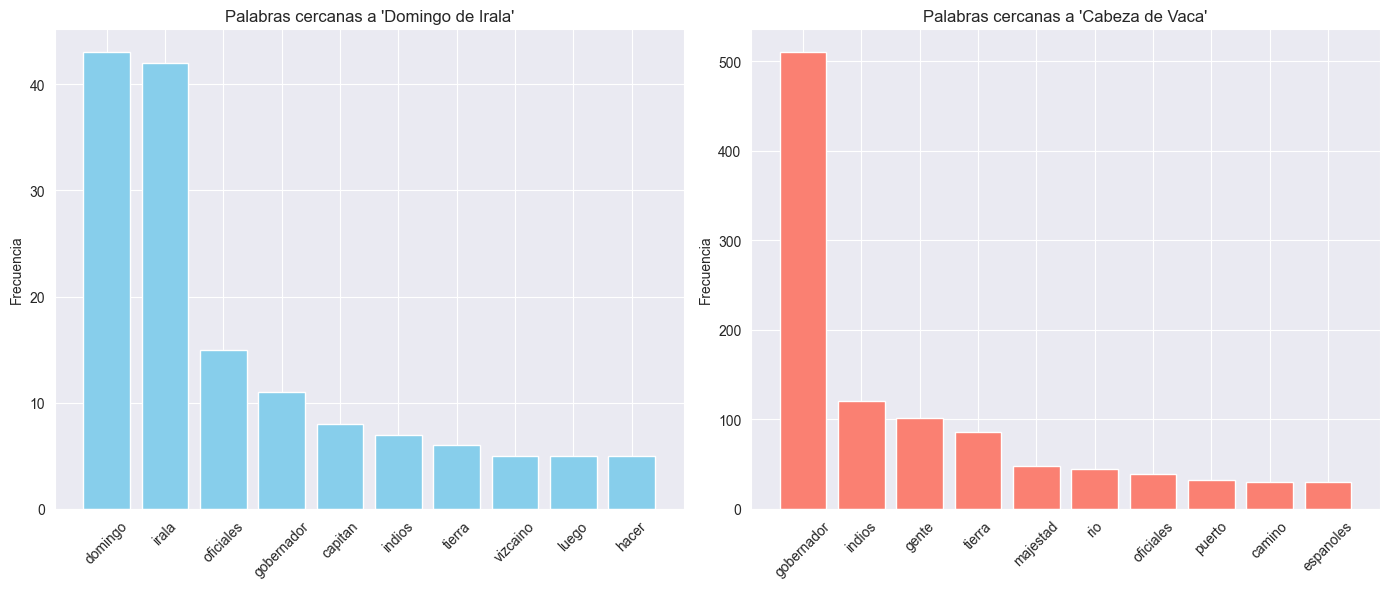

In [161]:
import matplotlib.pyplot as plt

# Selecciona las 10 palabras más frecuentes cerca de "irala" y "vaca"
top_irala = cooc_irala_counter.most_common(10)
top_vaca = cooc_vaca_counter.most_common(10)

# Desempaqueta palabras y frecuencias
words_irala, freqs_irala = zip(*top_irala)
words_vaca, freqs_vaca = zip(*top_vaca)

plt.figure(figsize=(14, 6))

# Gráfico para "irala"
plt.subplot(1, 2, 1)
plt.bar(words_irala, freqs_irala, color='skyblue')
plt.title("Palabras cercanas a 'Domingo de Irala'")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")

# Gráfico para "vaca"
plt.subplot(1, 2, 2)
plt.bar(words_vaca, freqs_vaca, color='salmon')
plt.title("Palabras cercanas a 'Cabeza de Vaca'")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

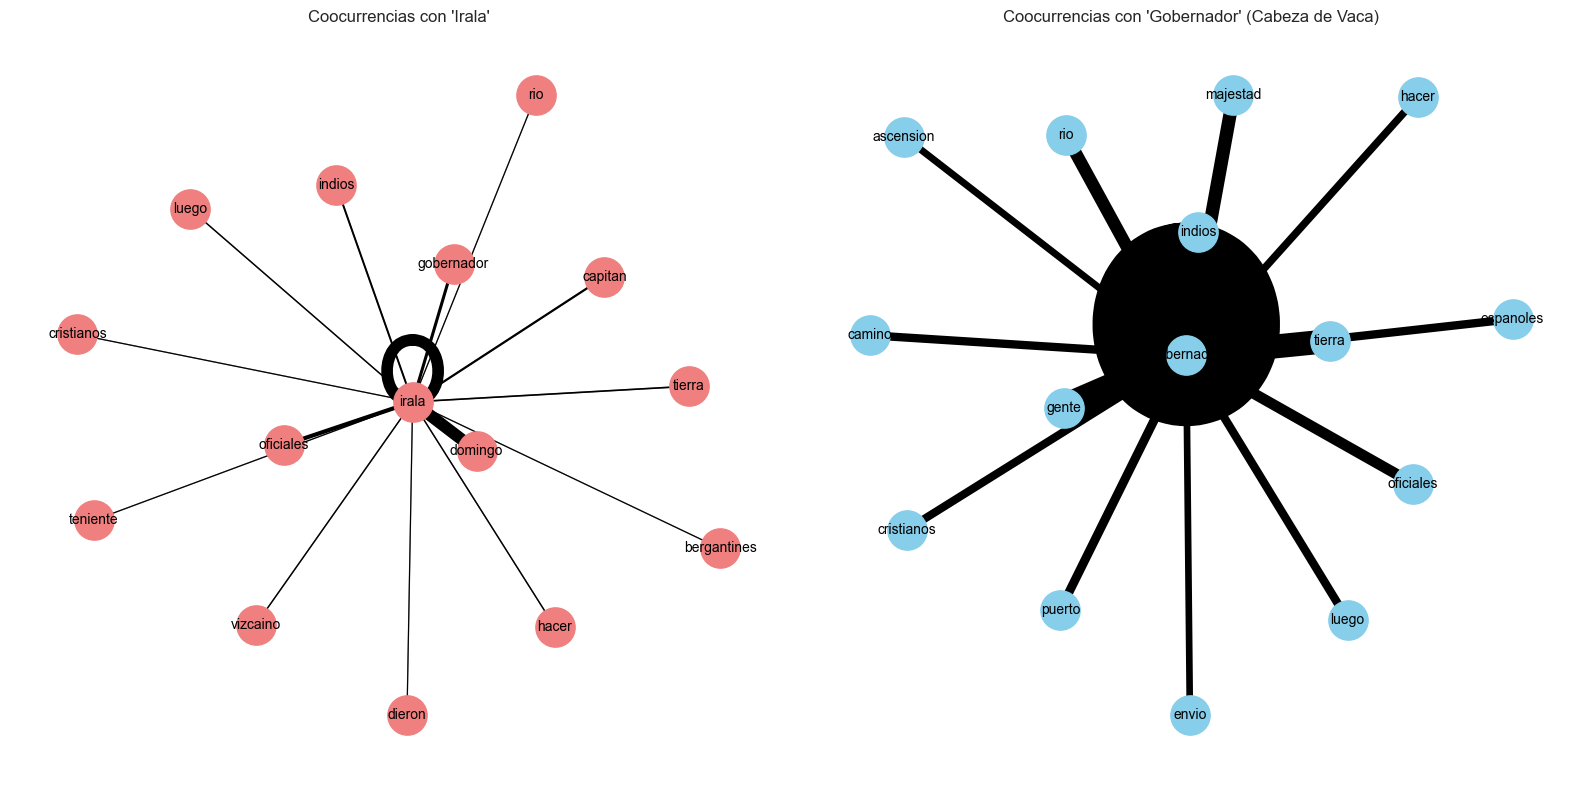

In [163]:
import networkx as nx
top_irala = cooc_irala_counter.most_common(15)
top_vaca = cooc_vaca_counter.most_common(15)

# Crear grafos
G_irala = nx.Graph()
for word, freq in top_irala:
    G_irala.add_edge("irala", word, weight=freq)

G_vaca = nx.Graph()
for word, freq in top_vaca:
    G_vaca.add_edge("gobernador", word, weight=freq)

# Visualización de los dos grafos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Grafo Irala
pos_irala = nx.spring_layout(G_irala, seed=42)
nx.draw(G_irala, pos_irala, ax=axes[0], with_labels=True,
        node_color="lightcoral", edge_color="gray", node_size=800, font_size=10)
edges_irala = nx.draw_networkx_edges(G_irala, pos_irala, ax=axes[0], width=[G_irala[u][v]['weight']*0.2 for u,v in G_irala.edges()])
axes[0].set_title("Coocurrencias con 'Irala'")

# Grafo Vaca
pos_vaca = nx.spring_layout(G_vaca, seed=42)
nx.draw(G_vaca, pos_vaca, ax=axes[1], with_labels=True,
        node_color="skyblue", edge_color="gray", node_size=800, font_size=10)
edges_vaca = nx.draw_networkx_edges(G_vaca, pos_vaca, ax=axes[1], width=[G_vaca[u][v]['weight']*0.2 for u,v in G_vaca.edges()])
axes[1].set_title("Coocurrencias con 'Gobernador' (Cabeza de Vaca)")

plt.tight_layout()
plt.show()